In [1]:
import joblib
import numpy as np
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
from gensim.corpora import Dictionary
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from pyLDAvis import gensim
import pyLDAvis
import numpy as np

In [2]:
cls = joblib.load('./classifyModel/EN/poly.model')

In [3]:
def map2list(x):
    return x.split()

In [4]:
dataFrame = pd.read_csv('./ENdata/reddit_2.csv')
texts = dataFrame['text'].map(map2list).values
dictionary = Dictionary(texts)
# 压缩词向量，去掉出现的文章小于2的词，和在50%的文章都出现的词，整体长度限制在1000
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in texts]
# 进行TF/IDF编码
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [5]:
lda = models.ldamodel.LdaModel.load('./ENmodel/batch1/14.model')

In [6]:
predict_matrix = np.zeros([len(corpus_tfidf), 14])
for i in range(len(corpus_tfidf)):
    row = lda[corpus_tfidf[i]]
    for j, t in row:
        predict_matrix[i][j] = t
np.save('./ENdata/topic14/doc_topic_1to2_track.npy', predict_matrix)
predict_matrix

array([[0.10318536, 0.01840851, 0.23607971, ..., 0.01840849, 0.10754294,
        0.10850319],
       [0.03571467, 0.03571467, 0.03571467, ..., 0.03571467, 0.53570932,
        0.03571467],
       [0.03571446, 0.03571446, 0.03571458, ..., 0.03571454, 0.0357145 ,
        0.0357145 ],
       ...,
       [0.01718935, 0.01718942, 0.17744535, ..., 0.0171893 , 0.27965906,
        0.01718937],
       [0.03571475, 0.03571475, 0.03571475, ..., 0.03571475, 0.03571475,
        0.03571475],
       [0.08279705, 0.07413941, 0.080988  , ..., 0.01478043, 0.14094882,
        0.01478043]])

In [7]:
result = cls.predict(predict_matrix)

In [9]:
nums = np.zeros(14)
for i in result:
    nums[i] += 1
nums

array([1407., 7627.,  996., 1697., 1443., 1625., 1983., 2094., 1122.,
       1074., 1270.,  935., 1162., 1107.])

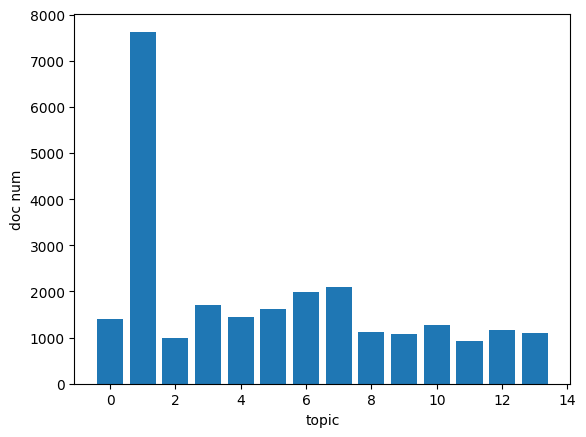

In [10]:
plt.xlabel('topic')
plt.ylabel('doc num')
plt.bar(list(range(14)), nums)
plt.savefig('./ENdata/topic14/第一阶段分类第二阶段柱形图.png')

In [14]:
print(cls.predict_proba(predict_matrix).shape)

(25542, 14)


In [13]:
maxPro = np.max(cls.predict_proba(predict_matrix), axis=1)
np.mean(maxPro)

0.8326414153035461

In [15]:
maxPro = [item<=0.5 for item in maxPro]
np.sum(maxPro)

2961

In [38]:
# 对新话题进行分析
newTopic = [item<=0.5 for item in maxPro]
newTexts = dataFrame[newTopic]
selected_rows

,time,text
4,10月21日,真主党 火箭 导弹
12,10月21日,眼 以色列 媒体报道 军事基地 交火 守军 士兵 遗物 家属 部队 仓库 手机 钱包 电子产...
24,10月21日,资料 全美 名牌大学 教授 犹太人 全美 律师 行业 犹太人 福布斯 富豪榜 前 人位 犹太...
33,10月21日,热门 舆论 力压 人 人 流浪狗 以色列 子弹
40,10月21日,中国 公民 同胞 地区 国家 地区 公民 态度 态度 祖国 战争 平民 表示同情 祖国 指 ...
...,...,...
3192,11月03日,以色列国防军 工程 部队 加沙 地带 哈马斯 隧道
3207,11月03日,人类 自由人 联合体 路 奴隶 战争 全球 乱象 美国 代表 资本主义 私有制 制度 财富 ...
3210,11月03日,美国国防部 特种 部长 克里斯托弗 梅尔 证实 以色列 部署 特种部队 角色 哈马斯 人员 ...
3216,11月03日,哈马斯 性质 世界 分歧 恐怖主义 恐怖主义 国家 美国 加拿大 英国 日本 瑞士 以色列 ...


In [39]:
texts = newTexts['text'].map(map2list).values
dictionary = Dictionary(texts)
# 压缩词向量，去掉出现的文章小于2的词，和在50%的文章都出现的词，整体长度限制在1000
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in texts]
# 进行TF/IDF编码
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [42]:
# 训练LDA
lda = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5, passes=50)
lda.print_topics(num_words=25)

[(0,
  '0.013*"中国" + 0.010*"世界" + 0.009*"国家" + 0.007*"和平" + 0.007*"国际" + 0.007*"人" + 0.007*"埃及" + 0.006*"巴以" + 0.006*"美国" + 0.006*"战争" + 0.006*"泽" + 0.005*"连斯基" + 0.005*"祖国" + 0.005*"乌克兰" + 0.005*"俄罗斯" + 0.005*"欧洲" + 0.005*"立场" + 0.004*"恐怖主义" + 0.004*"词" + 0.004*"阿拉伯" + 0.004*"局势" + 0.004*"巴勒斯坦" + 0.004*"民众" + 0.004*"社会" + 0.004*"哈马斯"'),
 (1,
  '0.011*"哈马斯" + 0.009*"美国" + 0.007*"世界" + 0.007*"林肯" + 0.007*"德国" + 0.007*"联合国" + 0.006*"地道" + 0.006*"加沙" + 0.006*"布" + 0.006*"俄罗斯" + 0.005*"内" + 0.005*"巴勒斯坦" + 0.005*"人" + 0.005*"中国" + 0.005*"电视台" + 0.005*"战争" + 0.005*"媒" + 0.005*"叙利亚" + 0.004*"国务卿" + 0.004*"小时" + 0.004*"决议" + 0.004*"媒体" + 0.004*"代表" + 0.004*"人员" + 0.004*"情绪"'),
 (2,
  '0.009*"记者" + 0.007*"人" + 0.007*"中国" + 0.007*"废墟" + 0.006*"哈马斯" + 0.006*"舆论" + 0.006*"特拉维夫" + 0.005*"家庭" + 0.005*"美国" + 0.005*"狗" + 0.005*"难民营" + 0.005*"火箭弹" + 0.005*"事件" + 0.005*"州长" + 0.004*"城市" + 0.004*"资本" + 0.004*"拜登" + 0.004*"地区" + 0.004*"前线" + 0.004*"地中海" + 0.004*"和平" + 0.004*"伊朗" + 0.004*"家人" + 0.004*"信息" 